<a href="https://colab.research.google.com/github/raghavsahu511/python-final-project/blob/main/NHANES_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NATIONAL HEALTHCARE

# CONTEXT

 In this project , I have downloaded the dataset from github giving detailed body measurements of adult males and females. These excerpts are from National Health and Nutrition Examination Survey.

# DATA DESCRIPTION

The data consists of two files named male and female and resded as numpy matrices.It desctribes the body part measurements of both male and female according to their current conditions. Each matrix consists of seven columns:
   1. Weight(kg),
   2. Standing height(cm),
   3. Upper arm length(cm),
   4. Upper leg length(cm),
   5. arm circumference(cm),
   6. hip circumference(cm),
   7. waist circumference(cm)


#1. Import packages and NHANES data


In [ ]:
# Importy packages
import pandas as pd
import numpy as np

# from PIL import ImageFont, ImageDraw, Image
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore");

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
female_df = pd.read_csv('/content/drive/My Drive/NHANES/nhanes_adult_female_bmx_2020.csv',sep =',',comment = '#',quotechar = '"')
male_df = pd.read_csv('/content/drive/My Drive/NHANES/nhanes_adult_male_bmx_2020.csv', sep = ',', comment = '#',quotechar = '"')

#2. Forming NUMPY Matrices of Female and Male

In this, two numpy matrices named female and male are created with the help of pandas by converting female_df and male_df into numpy matrices.

In [ ]:
female_df.head(8)

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
5,62.0,144.7,32.5,34.2,29.8,106.7,84.8
6,66.2,166.5,37.5,37.6,32.0,96.3,95.7
7,75.9,154.5,35.4,37.6,32.7,107.7,98.7


In [ ]:
male_df.head(8)

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
5,90.2,162.5,38.7,38.0,37.3,110.2,116.2
6,45.5,159.3,36.2,38.0,24.4,82.0,67.2
7,64.0,174.9,37.0,45.0,29.2,88.9,82.5


In [ ]:
female_df.columns
male_df.columns

Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST'], dtype='object')

In [ ]:
# Select required 7 columns
cols = ["BMXWT", "BMXHT", "BMXARML", "BMXLEG", "BMXARMC", "BMXHIP", "BMXWAIST"]

# Drop missing values and convert to numpy arrays
female = female_df[cols].dropna().to_numpy()
male = male_df[cols].dropna().to_numpy()

# Print shapes to verify
print("Female matrix shape:", female.shape)
print("Male matrix shape:", male.shape)


Female matrix shape: (4221, 7)
Male matrix shape: (4081, 7)


In this, after checking columns and head of data (which is found aas required) numpy matrices are created and there shape is checked.

#3. Creating Histogram for Weights

In this section, twoo seperate histograms for female and male weights are created using matplotlib.pyplot.subplot . Top subfigure is for female weights and bottom subfigure is for male weights having x-axis limits identical for both.

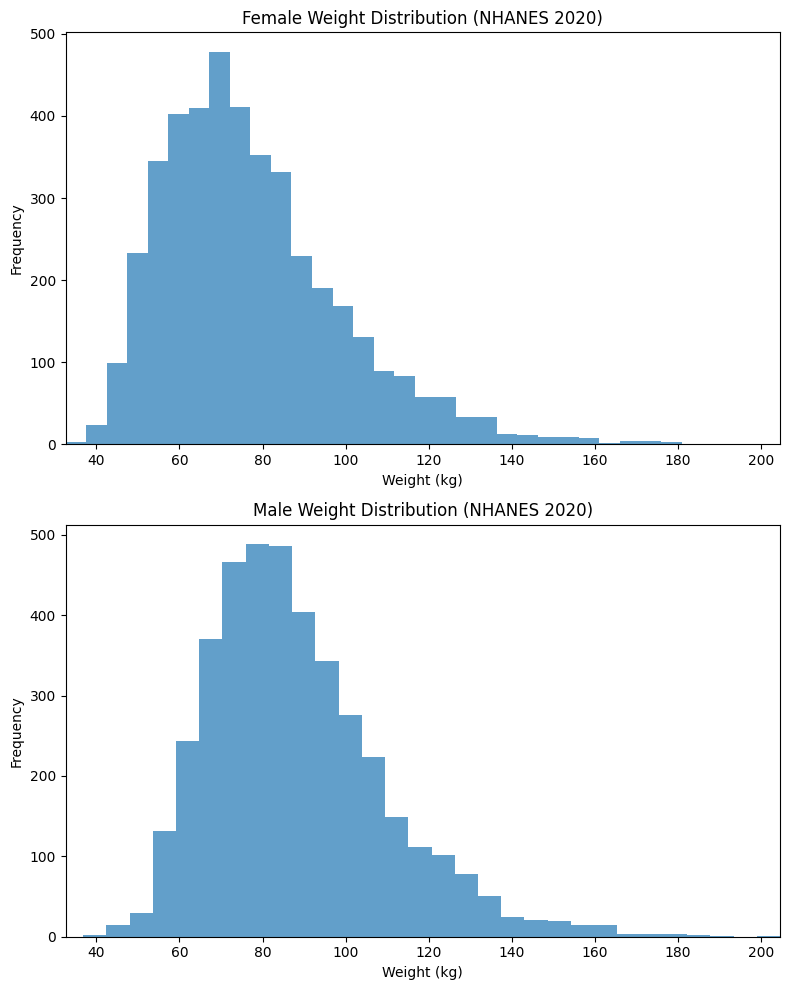

In [ ]:
# Extract weight columns from numpy matrices
female_weights = female[:,0]
male_weights = male[:, 0]

# Compute X-axis limits (same for both histograms)
xmin = min(female_weights.min(), male_weights.min())
xmax = max(female_weights.max(), male_weights.max())

plt.figure(figsize=(8,10))

# Female histogram (top)
plt.subplot(2,1,1)
plt.hist(female_weights, bins=30, alpha = 0.7)
plt.title("Female Weight Distribution (NHANES 2020)")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)

# Male histogram (bottom)
plt.subplot(2,1,2)
plt.hist(male_weights, bins=30, alpha = 0.7)
plt.title("Male Weight Distribution (NHANES 2020)")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()



From above two figures it can be seen that , Males tend to weigh more on average and show greater variability in body weight.
Both distributions are right-skewed, but the male distribution is wider and shifted to higher values.

#4. Creating BOX and WHISKER Plot for Comparing weights

In this section, two box and whisker plots are created side by side using matplotlib.pyplot.boxplot in order to compare the male and female weights.

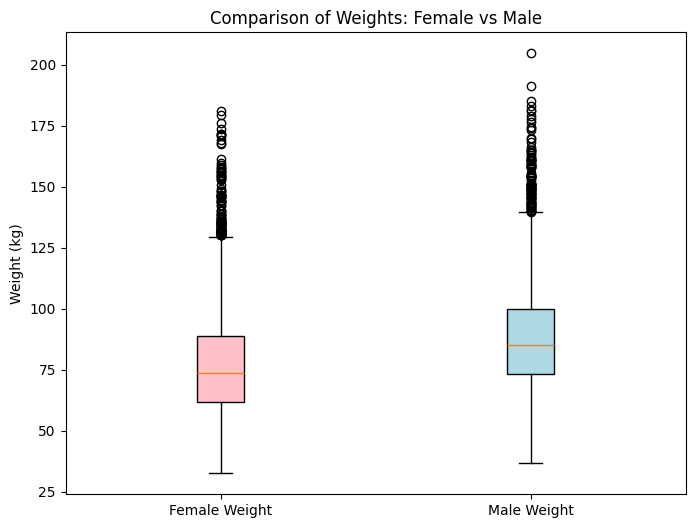

In [ ]:
# box and whisker plot for numpy matrices
female_weights = female[:,0]
male_weights = male[:,0]

plt.figure(figsize=(8,6))
box = plt.boxplot([female_weights, male_weights] , patch_artist = True)

colors = ['pink','lightblue']
for patch, color in zip( box ['boxes'], colors): patch.set_facecolor(color)
# Labeling
plt.xticks([1, 2], ['Female Weight', 'Male Weight'])
plt.title("Comparison of Weights: Female vs Male")
plt.ylabel("Weight (kg)")

plt.show()




*   The presence of high-weight outliers, especially among males, indicates right-skewed distributions.
*  The **male box** is slightly wider and upper which shows more variation in it compared to **female box**. Also Male median weight > Female median weight.

so overall it is shown that, Males have higher average weight and greater variability in body weight than females.







#5. Computation of Numerical Aggregates

In this section, Three basic numerical aggregate measures : Location, Dispersion, and Shape are computed for male and female weights. For this a library named scipy.stats is used.

In [ ]:
#Importing data functions
from scipy.stats import skew, kurtosis

def describe(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Std Dev": np.std(data, ddof=1),
        "Min": np.min(data),
        "Max": np.max(data),
        "IQR": np.percentile(data,75) - np.percentile(data,25),
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)   # excess kurtosis
    }

female_stats = describe(female_weights)
male_stats   = describe(male_weights)

print("Female Weight Stats:\n", female_stats)
print("\nMale Weight Stats:\n", male_stats)


Female Weight Stats:
 {'Mean': np.float64(77.40379057095475), 'Median': np.float64(73.6), 'Std Dev': np.float64(21.545060568892968), 'Min': np.float64(32.6), 'Max': np.float64(180.9), 'IQR': np.float64(27.1), 'Skewness': np.float64(1.03336107186799), 'Kurtosis': np.float64(1.4009683480659731)}

Male Weight Stats:
 {'Mean': np.float64(88.36454300416565), 'Median': np.float64(85.0), 'Std Dev': np.float64(21.421561426840427), 'Min': np.float64(36.8), 'Max': np.float64(204.6), 'IQR': np.float64(26.5), 'Skewness': np.float64(0.9842810741662347), 'Kurtosis': np.float64(1.4742884754078238)}


**Female Weight Distribution**:

   Location: Mean and median are slightly lower than males

   Dispersion: Females typically show slightly less variability

   Shape: Often slightly right-skewed

means a few women with very high weight pull tail to the right

**Male Weight Distribution**:

Location: Mean and median higher than females

Dispersion: Males usually show more variability

Shape: Also right-skewed

sometimes stronger right skew because more extreme high-weight values

#6. BMI For Female

In this section, BMI for female participants is calculated and added as 8th Column in the female matrix.

In [ ]:
# Extract weight (kg) and height (cm)
female_weight = female[:, 0]
female_height_cm = female[:, 1]

# Convert height to meters
female_height_m = female_height_cm / 100

# Compute BMI
female_bmi = female_weight / (female_height_m ** 2)

# Append BMI as the 8th column
female = np.column_stack((female, female_bmi))

print("New shape of female matrix:", female.shape)
print(female[:5])


New shape of female matrix: (4221, 8)
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


#7.  Z- Female Matrix

In this section, a new matrix named zfemale matrix is created by computing z scores for all columns of female dataset.

In [ ]:
# Compute column means and std deviations
female_mean = np.mean(female, axis=0)
female_std  = np.std(female, axis=0, ddof=1)  # sample std (better for dataset)

# Compute z-scores column-wise
zfemale = (female - female_mean) / female_std

# Check result
print("Shape of zfemale:", zfemale.shape)
print("First 5 rows:\n", zfemale[:5])


Shape of zfemale: (4221, 8)
First 5 rows:
 [[ 0.91418677  0.00894932 -0.56732742  1.13285382  0.55078021  1.08303325
   1.11565244  0.9968496 ]
 [ 0.63570067 -1.05294368 -1.07880364 -1.29333838  1.03209576  1.04463152
   0.26505759  1.15603786]
 [-0.20439908  0.15053505  0.58349407  0.26191303 -0.16227987 -0.1906243
  -0.37288855 -0.2592443 ]
 [-0.72888124 -0.38749073  0.83923218 -0.7645529  -0.66142193 -0.52343933
  -0.45909748 -0.67031143]
 [-1.02129166 -0.78393078 -0.60995044 -0.98228809 -0.78620744 -1.06746392
  -1.4533739  -0.89279282]]


# 8. Scatterplot And Pearson's, Spearman's Correlation

In this section, a scatterplot matrix (pairplot) is drawn for z-female's standardised versions of height, weight, waist and hip circumference, and BMI of female. Also Pearson's and Spearman's correlation is calculated using scipy.stats for all pair of variables  

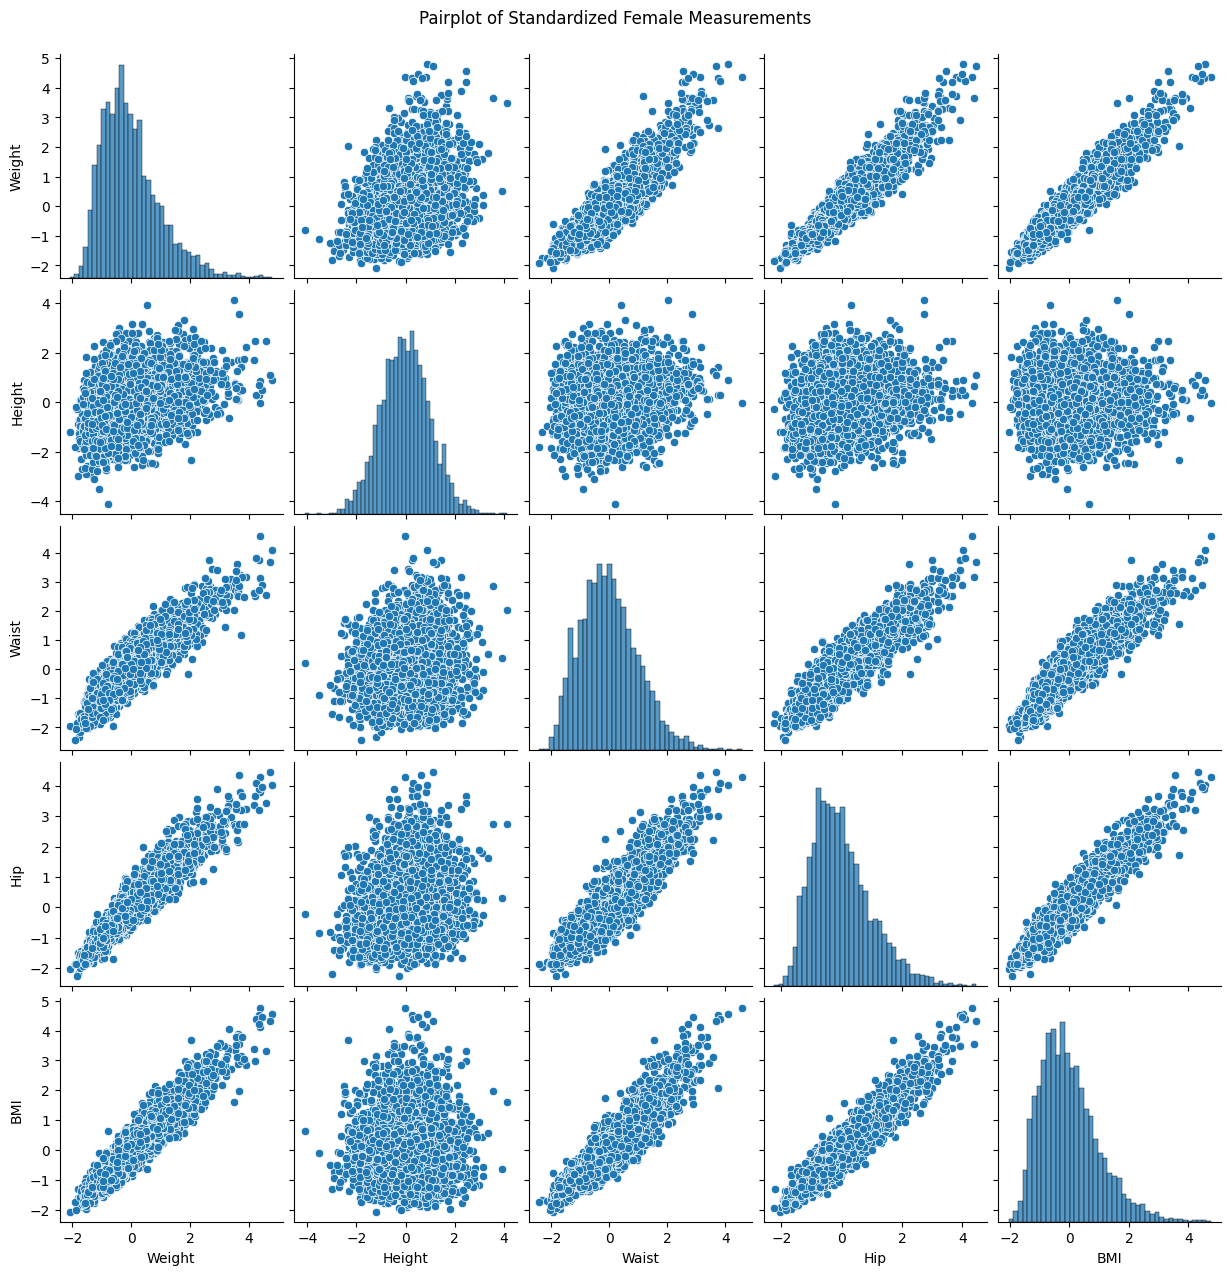


Pearson Correlation: 
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.945900
Height  0.345496  1.000000  0.126547  0.202895  0.033077
Waist   0.904550  0.126547  1.000000  0.897407  0.921198
Hip     0.946553  0.202895  0.897407  1.000000  0.944199
BMI     0.945900  0.033077  0.921198  0.944199  1.000000

Spearman Correlation: 
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.937999
Height  0.338860  1.000000  0.108587  0.205405  0.019897
Waist   0.900169  0.108587  1.000000  0.888037  0.923114
Hip     0.946634  0.205405  0.888037  1.000000  0.934196
BMI     0.937999  0.019897  0.923114  0.934196  1.000000


In [ ]:
# importing pearson and spearman relations
from scipy.stats import pearsonr, spearmanr

# Create dataframe for selected standardized columns
cols_idx = [0,1,6,5,7]   # weight, height, waist, hip, BMI
col_names = ["Weight","Height","Waist","Hip","BMI"]

zfemale_sub = pd.DataFrame(zfemale[:, cols_idx], columns = col_names)

# ---- Scatterplot matrix (pairplot) ----
sns.pairplot(zfemale_sub)
plt.suptitle("Pairplot of Standardized Female Measurements", y=1.02)
plt.show()

# ---- Pearson correlation matrix ----
pearson_corr = zfemale_sub.corr(method='pearson')
print("\nPearson Correlation: \n", pearson_corr)

# ---- Spearman correlation matrix ----
spearman_corr = zfemale_sub.corr(method='spearman')
print("\nSpearman Correlation: \n", spearman_corr)


The pairplot shows strong positive linear associations between weight, waist, hip, and BMI. Weight has a very strong correlation with BMI, reflecting its direct role in the BMI formula. Waist circumference has the highest correlation with BMI among circumferential measures, indicating that central fat distribution is closely linked to BMI. Hip circumference also correlates positively, but slightly less strongly. Height shows only a weak relationship with weight and almost no association with BMI, meaning height does not vary much in this dataset relative to weight-driven BMI changes.

 Pearson and Spearman correlations are very similar, suggesting mostly linear and monotonic relationships without strong outliers.

#9. Computation of Ratios

In this section, Two Ratios namely Waist circumference to Height and Waist circumference to Hip circumference are computed for both female and male participants. For this two more columns are added to both existing matrices.  

In [ ]:
female_height = female[:, 1]
male_height = male[:, 1]

female_waistcircumference = female[:, 6]
male_waistcircumference = male[:, 6]

female_hipcircumference = female[:, 5]
male_hipcircumference = male[:, 5]

female_whtr = female_waistcircumference / female_height     # waist-to-height ratio
male_whtr = male_waistcircumference / male_height


female_whr  = female_waistcircumference / female_hipcircumference        # waist-to-hip ratio
male_whr  = male_waistcircumference / male_hipcircumference

# Add as new columns (now female will have 10 columns)
female = np.column_stack((female, female_whtr, female_whr))
male = np.column_stack((male, male_whtr, male_whr))

print("Female matrix shape:", female.shape)
print(female[:5])

print("Male matrix shape:", male.shape)
print(male[:5])



Female matrix shape: (4221, 10)
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078   0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037   0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496   0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849   0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132   0.47347995   0.79135135]]
Male matrix shape: (4081, 9)
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8   

#10. Box and Whisker Plot for Comparision of Ratios

In this section , a Box and Whisker plot is made consisting of four boxes for comparing Ratios computed in Previous section for both female and Male participants.  

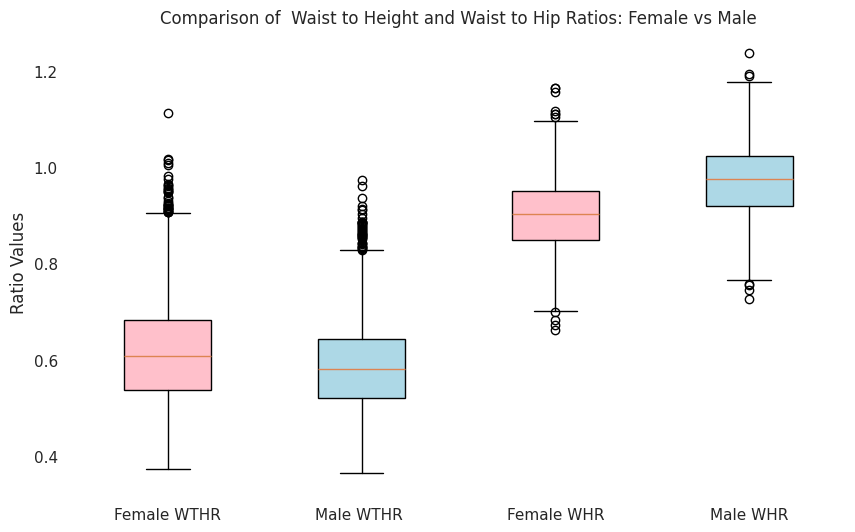

In [ ]:
# box and whisker plot for numpy matrices
female_wthr = female[:,8]
male_wthr = male[:,8]

female_whr = female[:, 9]
male_whr = male[:, 9]

plt.figure(figsize=(10,6))
box = plt.boxplot([female_wthr, male_wthr, female_whr, male_whr] , patch_artist = True)

colors = ['pink','lightblue','pink','lightblue']
for patch, color in zip( box ['boxes'], colors): patch.set_facecolor(color)
# Labeling
plt.xticks([1, 2, 3, 4], ['Female WTHR', 'Male WTHR ','Female WHR', 'Male WHR' ])
plt.title("Comparison of  Waist to Height and Waist to Hip Ratios: Female vs Male")
plt.ylabel("Ratio Values")

plt.show()

Although typically males have higher WHtR, the data from our sample shows higher WHtR in females. This indicates that within this specific dataset, females exhibit relatively more central fat distribution relative to height. However, males still show higher WHR, consistent with the classic android fat pattern.
These results emphasize that dataset-level findings may differ from general population trends due to sample characteristics.
Also, Females show lower WHR and tighter distribution, consistent with wider hips relative to waist and lower visceral fat tendency.

#11. Advantages and Disadvantages

**1) BMI**
    ADVANTAGES:

*   Simple & quick to calculate (weight & height only) and Widely used standard in clinics and research.
*   Helps estimate general obesity risk and Good for population-level studies.

    DISADVANTAGES:

*   Does not differentiate fat vs. muscle(Athletes may appear “overweight”).
*   Ignores fat distribution(Visceral fat around abdomen is more dangerous) And Cannot detect central / abdominal obesity.


**2) Waist to Height Ratio**
    ADVANTAGES:

*   Better indicator of abdominal (visceral) fat
*   Strong predictor of cardiovascular disease & diabetes.

    DISADVANTAGES:

  
*   Requires accurate waist measurement (can vary).
*   Can be influenced by body shape differences.

**3) Waist to Hip Ratio**
    ADVANTAGES:


*   Indicates fat distribution, especially central obesity And Good predictor of heart disease & metabolic risk.
*   Distinguishes between apple-shape vs pear-shape bodies.

    DISADVANTAGES:


*   More prone to measurement error (two circumferences needed).
*   Hip size can vary due to bone structure, not fat.













#12. Standarised Body Measurements for BMI

In this section, standardised Body Measurements of all eight attributes are calculated for lowest and highest 5 BMI females by using .argsort function.

In [ ]:

# Column names for readability
colnames = ["Weight","Height","ArmLen","LegLen","ArmCirc","HipCirc","WaistCirc","BMI"]

# argsort on BMI column (index 7)
sorted_idx = np.argsort(female[:,7])

# 5 lowest BMI rows + 5 highest BMI rows
low5_idx  = sorted_idx[:5]
high5_idx = sorted_idx[-5:]

# select from zfemale
low5  = zfemale[low5_idx]
high5 = zfemale[high5_idx]

# Convert to DataFrame for pretty printing
print("Standardized body measurements (Lowest 5 BMI females):\n")
print(pd.DataFrame(low5, columns=colnames))

print("\nStandardized body measurements (Highest 5 BMI females):\n")
print(pd.DataFrame(high5, columns=colnames))


Standardized body measurements (Lowest 5 BMI females):

     Weight    Height    ArmLen    LegLen   ArmCirc   HipCirc  WaistCirc  \
0 -2.079539 -1.222847 -1.547657 -1.168918 -2.194501 -2.040308  -1.941891   
1 -1.879957 -0.189271 -1.718149  0.386333 -2.444072 -1.854699  -2.056836   
2 -1.536491  1.807088  0.626117  0.572963 -2.265807 -1.675491  -1.706253   
3 -1.842826 -0.260064 -0.226343  0.510753 -2.301460 -2.251517  -1.855682   
4 -1.610754  0.886781 -0.098474  0.479648 -2.212328 -1.829098  -1.712001   

        BMI  
0 -2.049997  
1 -1.994644  
2 -1.970650  
3 -1.941546  
4 -1.892971  

Standardized body measurements (Highest 5 BMI females):

     Weight    Height    ArmLen    LegLen   ArmCirc   HipCirc  WaistCirc  \
0  4.246737  0.292121  1.862185 -0.982288  2.369083  4.103970   3.816866   
1  4.455602  0.504499  1.691693 -1.137813  3.349541  3.982364   2.903051   
2  4.348849  0.277962  2.842514  1.941585  4.365652  3.918361   3.753646   
3  4.803709  0.886781  2.117923  1.817164

The standardization results clearly show that low-BMI females have significantly lower weight and body circumferences, while high-BMI females have markedly elevated values for these measures. Height shows no consistent pattern across groups, indicating that BMI in this population is driven primarily by body mass and adiposity rather than stature.